# <center>Benford's Law Implementation

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import chisquare

### Loading the data

In [2]:
df=pd.read_csv('benford.csv')
df

,State,City,Population
0,Alabama,Autauga County,54571
1,Alabama,Baldwin County,182265
2,Alabama,Barbour County,27457
3,Alabama,NaN,22915
4,Alabama,Blount County,57322
...,...,...,...
3137,Wyoming,Sweetwater County,43806
3138,Wyoming,Teton County,21294
3139,Wyoming,Uinta County,21118
3140,Wyoming,Washakie County,8533


In [3]:
df_dist=pd.DataFrame(df['Population'])
df_dist

,Population
0,54571
1,182265
2,27457
3,22915
4,57322
...,...
3137,43806
3138,21294
3139,21118
3140,8533


# <center>1. First digit Benford's law

### Code to compute the distributions for first digits

In [4]:
def extract_first_digit(data):
    return data[:1]
df_dist['Population'] = df_dist['Population'].astype(str)
df_dist['first_digit'] = df_dist['Population'].apply(extract_first_digit)

first_dist = df_dist['first_digit'].value_counts()
first_digit = pd.DataFrame(index = first_dist.index , data = first_dist.values, columns = ['Count'])
first_digit['Distribution'] = first_digit['Count']/len(df_dist)
first_digit = first_digit.rename_axis('Digit').sort_values(by = ['Digit'])
first_digit = first_digit.reset_index()

### Input Distribution

In [5]:
first_digit

,Digit,Count,Distribution
0,1,953,0.303310
1,2,594,0.189052
2,3,374,0.119032
3,4,308,0.098027
4,5,213,0.067791
5,6,210,0.066836
6,7,182,0.057925
7,8,152,0.048377
8,9,156,0.049650


### Bar Plot of Digit Vs Distribution curve

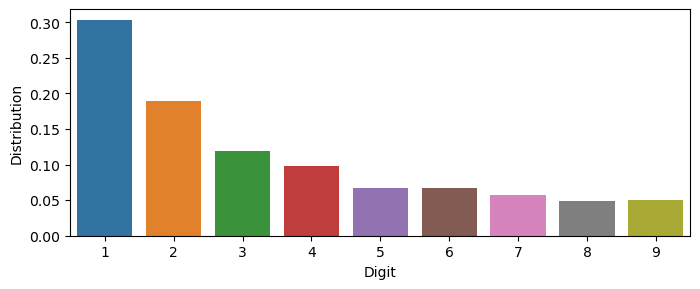

In [6]:
plt.figure(figsize=(8,3),dpi=100)
sns.barplot(data = first_digit, x = 'Digit', y = 'Distribution')
plt.show()

### Code to compute Benford's first digit Distribution

In [7]:
digit_count = [x for x in range(1,10)]

benford_first_digit = [math.log(1 + (1/d),10) for d in range(1,10)]
benfords_first_digit_dist = pd.DataFrame(benford_first_digit, index = digit_count)
benfords_first_digit_dist.columns = ['Distribution']
benfords_first_digit_dist = benfords_first_digit_dist.reset_index()
benfords_first_digit_dist.columns = ['Digit','Distribution']

### Benford's Distribution

In [8]:
benfords_first_digit_dist

,Digit,Distribution
0,1,0.301030
1,2,0.176091
2,3,0.124939
3,4,0.096910
4,5,0.079181
5,6,0.066947
6,7,0.057992
7,8,0.051153
8,9,0.045757


### Plot the Digit Vs Distribution curve for Input as well as Benford's curve

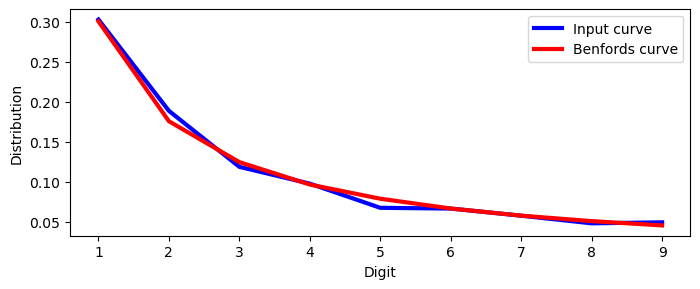

In [9]:
plt.figure(figsize=(8,3),dpi=100)
plt.plot(digit_count,first_digit['Distribution'],color='blue',lw=3,label='Input curve')
plt.plot(digit_count,benfords_first_digit_dist['Distribution'],color='red',lw=3,label='Benfords curve')
plt.xlabel('Digit')
plt.ylabel('Distribution')
plt.legend()
plt.show()

### As can be seen from the above plot that both the curves are overlapping, that confirms the given Input data follows first digit Benford's law 

In [10]:
MAD = abs(first_digit['Distribution'] - benfords_first_digit_dist['Distribution']).mean()
MAD

0.004499874210189271

### MAD Value : 0.004499874210189271

In [11]:
chisquare(first_digit['Distribution'], f_exp = benfords_first_digit_dist['Distribution'])

Power_divergenceResult(statistic=0.003383641286199644, pvalue=0.9999999999996592)

### Chi Square test p value : 0.9999999999996592

# <center>2. First Two Digits Benford's law

### Code to compute the distributions for first two digits

In [12]:
df_dist=pd.DataFrame(df['Population'])

def extract_first_two_digits(data):
    return data[:2]
df_dist['Population'] = df_dist['Population'].astype(str)
df_dist['first_two'] = df_dist['Population'].apply(extract_first_two_digits)

first_two_dist = df_dist['first_two'].value_counts()
first_two_digit = pd.DataFrame(index = first_two_dist.index , data = first_two_dist.values, columns = ['Count'])
first_two_digit['Distribution'] = first_two_digit['Count']/len(df_dist)
first_two_digit = first_two_digit.rename_axis('Digit').sort_values(by = ['Digit'])
first_two_digit = first_two_digit.reset_index()

### Input Distribution

In [13]:
first_two_digit

,Digit,Count,Distribution
0,10,129,0.041057
1,11,105,0.033418
2,12,94,0.029917
3,13,117,0.037237
4,14,94,0.029917
...,...,...,...
85,95,13,0.004137
86,96,21,0.006684
87,97,9,0.002864
88,98,17,0.005411


### Bar Plot of Digit Vs Distribution curve

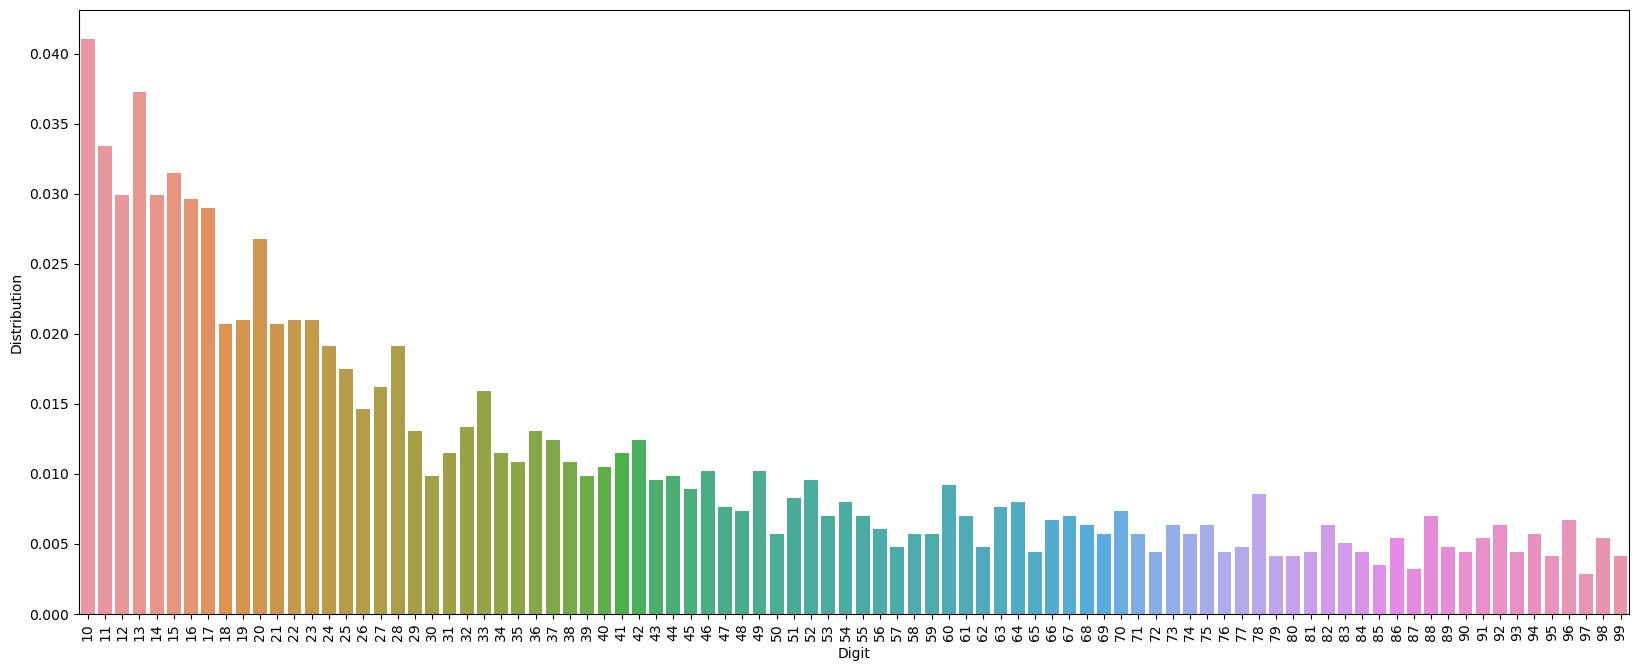

In [14]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(data = first_two_digit, x = 'Digit', y = 'Distribution')
plt.xticks(rotation = 90)
plt.show()

### Code to compute Benford's first two digits Distribution

In [15]:
two_digit_count = [x for x in range(10,100)]

benford_two_digit = [math.log(1 + (1/d),10) for d in range(10,100)]
benfords_two_digit_dist=pd.DataFrame(benford_two_digit, index = two_digit_count)
benfords_two_digit_dist.columns=['Distribution']
benfords_two_digit_dist = benfords_two_digit_dist.reset_index()
benfords_two_digit_dist.columns = ['Digit','Distribution']

### Benford's Distribution

In [16]:
benfords_two_digit_dist

,Digit,Distribution
0,10,0.041393
1,11,0.037789
2,12,0.034762
3,13,0.032185
4,14,0.029963
...,...,...
85,95,0.004548
86,96,0.004501
87,97,0.004454
88,98,0.004409


### Plot the Digit Vs Distribution curve for Input as well as Benford's curve

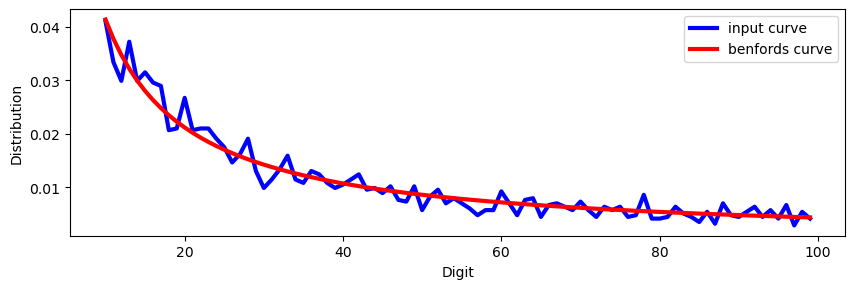

In [17]:
plt.figure(figsize=(10,3),dpi=100)
plt.plot(two_digit_count,first_two_digit['Distribution'],color='blue',lw=3,label='input curve')
plt.plot(two_digit_count,benfords_two_digit_dist['Distribution'],color='red',lw=3,label='benfords curve')
plt.xlabel('Digit')
plt.ylabel('Distribution')
plt.legend()
plt.show()

### As can be seen from the above plot that both the curves are almost overlapping, that confirms the given Input data follows first two digits Benford's law 

In [18]:
MAD_two_digit = abs(first_two_digit['Distribution']-benfords_two_digit_dist['Distribution']).mean()
MAD_two_digit

0.0014317365523687318

### MAD Value : 0.0014317365523687318

In [19]:
chisquare(first_two_digit['Distribution'], f_exp=benfords_two_digit_dist['Distribution'])

Power_divergenceResult(statistic=0.02654875114284626, pvalue=1.0)

### Chi Square test p value : 1.0